### Problem#1 : Runge-Kutta Method

#### Runge-Kutta Method
Assume ODE of the form,
$$x'(t)=f(t,x(t))$$
Initial condition $x(t_{0})=x_{0}$.

The explicit method is given by the formula
$$x_{n+1}=x_{n}+\frac{1}{6}h\left(k_1+k_2+k_3+k_4\right)$$

Where the constants $k_1$, $k_2$, $k_3$ and $k_4$ are given by,
$$k_1=f(t_n,x_n)$$
$$k_2=f\left(t_n+\frac{h}{2},x_n+\frac{hk_1}{2}\right)$$
$$k_3=f\left(t_n+\frac{h}{2},x_n+\frac{hk_2}{2}\right)$$
$$k_1=f(t_n+h,x_n+hk_3)$$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.optimize as opt

In [14]:
def RK4(func, x0, t_start, t_end, deltat):
    """
    This program solves a system of first order ODE using mid point method.
    
    user defined func: 
                        def diff_eqn(t, x):
                            if x < -1 or x > 1:
                                return np.nan
                            else:
                                return np.sqrt(1 - x**2)
    
    >>>t, x = RK4(diff_eqn, x0, 0, 1, 0.1)
    
        t:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        x:  [[0.         0.09983338 0.19866926 0.2955201  0.38941818 0.4794253
                          0.56464212 0.64421717 0.71735531 0.78332571 0.84146906]]
    
    Written by: Anand Mathew
    Date: 04/19/23
    
    """
    # Number of time steps.
    Nsteps = int((t_end - t_start) / deltat) + 1
    
    # Initializing.
    t = np.zeros(Nsteps)
    t[0] = t_start
    x = np.zeros((len(x0), Nsteps))
    x[:, 0] = x0
    
    # Calculating the final solutions using RK4.
    for i in range(Nsteps - 1):
        t[i+1] = t[i] + deltat
        
        # Solving for the constants
        k1 = func(t[i], x[:, i])
        k2 = func(t[i] + 0.5*deltat, x[:, i] + 0.5*deltat*k1)
        k3 = func(t[i] + 0.5*deltat, x[:, i] + 0.5*deltat*k2)
        k4 = func(t[i] + deltat, x[:, i] + deltat*k3)
        
        # Final equation to solve for the variables
        x[:, i+1] = x[:, i] + (1/6)*deltat*(k1 + 2*k2 + 2*k3 + k4)
    
    return t, x


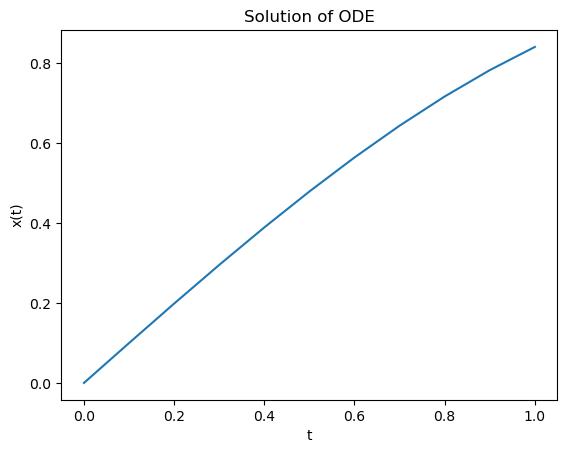

t:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x:  [[0.         0.09983338 0.19866926 0.2955201  0.38941818 0.4794253
  0.56464212 0.64421717 0.71735531 0.78332571 0.84146906]]


In [15]:
# ODE function
def diff_eqn(t, x):
    if x < -1 or x > 1:
        return np.nan
    else:
        return np.sqrt(1 - x**2)

# define the initial condition
x0 = np.array([0])

# solve the differential equation using the midpoint method
t, x = RK4(diff_eqn, x0, 0, 1, 0.1)

# plot the solution
plt.plot(t, x[0])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution of ODE')
plt.show()


print("t: ", t)
print("x: ", x)